El ejercicio consiste en entregar un Notebook con los siguientes puntos:

* Utilizar el API REST de StackEchange (https://api.stackexchange.com/) para obtener una muestra de más de 1000 preguntas sobre un tag concreto. Por ejemplo, el tag podría ser "python". Convertir esos datos en un DataFrame con al menos los siguientes elementos: identificador de usuario, identificador de pregunta, título, si se ha contestado o no, número de veces que se ha visto y fecha de creación. Sobre ese DataFrame , hacer lo siguiente:
	- Buscar la pregunta más antigua no contestada.
	- Obtener y dibujar la distribución de las visitas.
* Sobre el DataFrame anterior, incluir columnas adicionales obteniendo información del API sobre la respuesta más valorada a cada pregunta, con al menos el identificador de la respuesta, la puntuación, la fecha en que se creó y el identificador del usuario que respondió.
* Sobre el DataFrame anterior, extraer todos los usuarios diferentes que aparecen, y obtener el usuario de mayor y de menor reputación.


NOTA:

Los tres apartados corresponden, respectivamente a los niveles básico, medio y avanzado.
Para realizarlos hay que invocar a algunas de las llamadas del API de StackExchange, es conveniente primero probarlo con la interfaz de la documentación. Por ejemplo: probar con un identificador concreto de pregunta en la interfaz que aparece al final de esta página: https://api.stackexchange.com/docs/answers-on-questions






In [1]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time

<h1>Creación del Dataframe</h1>

In [4]:
#Creación del Dataframe

columns = ['questionID', 'userID', 'title', 'answered', 'viewed', 'creationDate']

rows = []

page = 1

while len(rows) < 1000:
    
    query = "https://api.stackexchange.com/2.2/questions?page=" + str(page) + "&pagesize=100&order=desc&sort=activity&tagged=python&site=stackoverflow"
    
    r = requests.get(query)
    jsonDf = json.loads(r.text)
    
    item = jsonDf['items']
    
    try:
        for j in range(0,len(item)):
        
            dictionaryColValue = {
                'questionID' : item[j]['question_id'],
                'userID' : item[j]['owner']['user_id'],
                'title' : item[j]['title'],
                'answered' : item[j]['is_answered'],
                'viewed' : item[j]['view_count'],
                'creationDate' : time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(item[j]['creation_date']))
            }
            rows.append(dictionaryColValue)
        
    except KeyError:
        print(KeyError)
    
    
    
        
    #print(row)
         
    has_more = jsonDf['has_more']
    #print(has_more)
    
    if (has_more == True):
        page += 1
    

df = pd.DataFrame(rows, columns=columns)
df = df.set_index('questionID')    

            
df.size     
   
df

    


<class 'KeyError'>
<class 'KeyError'>
<class 'KeyError'>


,userID,title,answered,viewed,creationDate
questionID,,,,,
54680310,10893977,can&#39;t run scrapy in virtualenv,False,2,2019-02-13 23:16:13
54678188,3326033,Iterate through two series in one line and the...,False,14,2019-02-13 20:43:11
54680307,9351007,How to apply Gurobi Traveling Salesman Problem...,False,2,2019-02-13 23:15:56
54680096,11048560,Problem with returning in recursion function,False,14,2019-02-13 22:58:47
54680296,11006888,Python script stops running when I import a GU...,False,2,2019-02-13 23:15:10
52352215,6881032,bluepy.btle.BTLEException: Failed to execute m...,False,87,2018-09-16 10:09:37
54679590,11048560,Why does debug skips elif lst[0] in speech in ...,False,20,2019-02-13 22:20:03
54678738,6698150,How I can integrate a ToolBar on my app with K...,False,19,2019-02-13 21:17:02
54657576,9705459,How to import an tmx map in pygame?,True,39,2019-02-12 20:43:14


<h1>Pregunta más antigua no contestada</h1>

In [15]:
df

dfNotAnswered = df[df.answered == False]

dfNotAnswered.sort_values('creationDate').head(1)

,userID,title,answered,viewed,creationDate
questionID,,,,,
10756609,402197,Problems with explicit wait and implicit wait ...,False,4940,2012-05-25 16:52:30


<h1>Obtener y dibujar la distribución de las visitas.</h1>

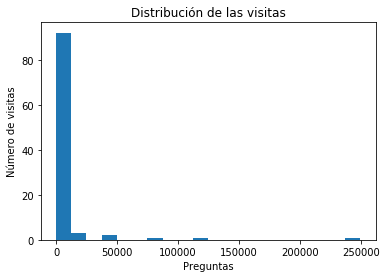

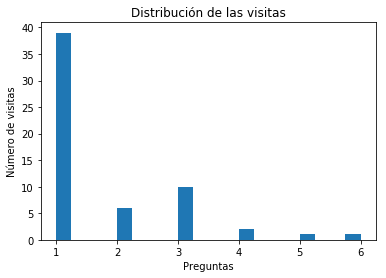

    viewed  count
4        7      6
17      20      5
15      18      4
9       12      4
19      22      3
14      17      3
12      15      3
11      14      3
26      31      3
7       10      3
6        9      3
5        8      3
3        6      3
33      41      3
24      28      2
22      26      2
18      21      2
29      36      2
16      19      2
8       11      2
48    9076      1
41     121      1
42     137      1
43     200      1
44     818      1
57  122015      1
45    1001      1
46    4089      1
47    4715      1
49    9271      1
39      86      1
50   11843      1
51   14509      1
56   82399      1
52   18970      1
55   47830      1
53   19359      1
54   46755      1
40     117      1
0        2      1
38      68      1
27      33      1
2        5      1
10      13      1
13      16      1
20      23      1
21      25      1
23      27      1
25      30      1
28      35      1
37      64      1
1        4      1
30      37      1
31      39      1
32      40

In [11]:
plt.hist(x=df['viewed'], bins=20, align='mid')
plt.xlabel('Preguntas')
plt.ylabel('Número de visitas')
plt.title('Distribución de las visitas')
plt.show()

dfViewed = df.groupby(['viewed']).size().reset_index(name='count').sort_values('count', ascending = False)
plt.hist(x=dfViewed['count'], bins=20, align='mid')
plt.xlabel('Preguntas')
plt.ylabel('Número de visitas')
plt.title('Distribución de las visitas')
plt.show()
print(dfViewed)

<h1>Respuesta más votada</h1>

Sobre el DataFrame anterior, incluir columnas adicionales obteniendo información del API sobre la respuesta más valorada a cada pregunta, con al menos el identificador de la respuesta, la puntuación, la fecha en que se creó y el identificador del usuario que respondió.

In [15]:
questionId = 54656033

queryAnswer = "/2.2/questions/" + str(questionId) + "/answers?order=desc&sort=activity&site=stackoverflow"
    
rAnser = requests.get(query)
jsonDfAnswer = json.loads(r.text)

item = jsonDf['items']

print(item)

bestScoreAnswer = -100
dictionaryAnswer = {}

for j in range(0,len(item)):

    
    
    if bestScoreAnswer < item[j]['score']:
        bestScoreAnswer = item[j]['score']

        dictionaryAnswer = {
            'answerID' : item[j]['answer_id'],
            'score' : item[j]['score'],
            'creationDate' : time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(item[j]['creation_date'])),
            'userID' : item[j]['owner']['user_id']
        }
        
    print(str(bestScoreAnswer))

[{'tags': ['python', 'python-3.x'], 'owner': {'reputation': 26, 'user_id': 10992592, 'user_type': 'registered', 'profile_image': 'https://www.gravatar.com/avatar/d17f363c7930d420ffe5a74c7c3a91b6?s=128&d=identicon&r=PG&f=1', 'display_name': 'Jonas Graffman', 'link': 'https://stackoverflow.com/users/10992592/jonas-graffman'}, 'is_answered': False, 'view_count': 40, 'answer_count': 1, 'score': 1, 'last_activity_date': 1550004487, 'creation_date': 1549993968, 'last_edit_date': 1550004487, 'question_id': 54655942, 'link': 'https://stackoverflow.com/questions/54655942/function-that-creates-a-new-file', 'title': 'Function that creates a new file'}, {'tags': ['python'], 'owner': {'reputation': 8, 'user_id': 10575688, 'user_type': 'registered', 'profile_image': 'https://lh4.googleusercontent.com/-oNf-49pF54A/AAAAAAAAAAI/AAAAAAAAADo/MS5cWJ7vjT4/photo.jpg?sz=128', 'display_name': 'Himo', 'link': 'https://stackoverflow.com/users/10575688/himo'}, 'is_answered': False, 'view_count': 4, 'answer_count

KeyError: 'answer_id'